In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import plotly.offline as py
import plotly.graph_objects as go

In [ ]:
# prompt: Read the csv file which is there in download

import pandas as pd
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

df = pd.read_csv(fn) # Assuming only one file is uploaded

# Now you can work with the dataframe 'df'
print(df.head()) # Display the first few rows of the dataframe


Saving nutrients_csvfile.csv to nutrients_csvfile.csv
User uploaded file "nutrients_csvfile.csv" with length 19760 bytes
                    Food Measure  Grams Calories Protein Fat Sat.Fat Fiber  \
0             Cows' milk   1 qt.    976      660      32  40      36     0   
1              Milk skim   1 qt.    984      360      36   t       t     0   
2             Buttermilk   1 cup    246      127       9   5       4     0   
3  Evaporated, undiluted   1 cup    252      345      16  20      18     0   
4         Fortified milk  6 cups  1,419    1,373      89  42      23   1.4   

  Carbs        Category  
0    48  Dairy products  
1    52  Dairy products  
2    13  Dairy products  
3    24  Dairy products  
4   119  Dairy products  


In [ ]:
df=df.replace("t",0)
df=df.replace("t'",0)

df.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [ ]:
# prompt: Using dataframe df: nutrients=nutrients.replace(",","", regex=True)
# nutrients['Fiber']=nutrients['Fiber'].replace("a","", regex=True)
# nutrients['Calories'][91]=(8+44)/2

# Replace commas with empty strings in the entire dataframe
df = df.replace(",", "", regex=True)

# Replace "a" with an empty string in the 'Fiber' column
df['Fiber'] = df['Fiber'].replace("a", "", regex=True)

# Calculate the average of 8 and 44 and assign it to the 'Calories' column at index 91
df.loc[91, 'Calories'] = (8 + 44) / 2


In [ ]:
# prompt: nutrients['Grams']=pd.to_numeric(nutrients['Grams'])
# nutrients['Calories']=pd.to_numeric(nutrients['Calories'])
# nutrients['Protein']=pd.to_numeric(nutrients['Protein'])
# nutrients['Fat']=pd.to_numeric(nutrients['Fat'])
# nutrients['Sat.Fat']=pd.to_numeric(nutrients['Sat.Fat'])
# nutrients['Fiber']=pd.to_numeric(nutrients['Fiber'])
# nutrients['Carbs']=pd.to_numeric(nutrients['Carbs']) generate with df

import pandas as pd
# Convert specified columns to numeric, handling errors by coercing to NaN
numeric_cols = ['Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
df.dtypes

,0
Food,object
Measure,object
Grams,int64
Calories,float64
Protein,int64
Fat,int64
Sat.Fat,float64
Fiber,float64
Carbs,float64
Category,object


In [ ]:
print(df.isnull().any())
print('-'*245)
print(df.describe())
print('-'*245)

Food        False
Measure     False
Grams       False
Calories     True
Protein     False
Fat         False
Sat.Fat      True
Fiber        True
Carbs       False
Category    False
dtype: bool
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
             Grams     Calories     Protein         Fat     Sat.Fat  \
count   335.000000   334.000000  335.000000  335.000000  333.000000   
mean    143.211940   188.802395    8.573134    8.540299    6.438438   
std     138.668626   184.453018   17.733722   19.797871   18.517656   
min      11.000000     0.000000   -1.000000    0.000000    0.000000   
25%      60.000000    75.000000    1.000000    0.000000    0.000000   
50%     108.000000   131.000000    3.000000    1.000000    0.000000   
75%     200.000000   250.000000   12.000000   10.000000    8.0000

In [ ]:
df=df.dropna()
df.shape

(331, 10)

<ipython-input-10-bcd5ee64689b>:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-10-bcd5ee64689b>:15: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-10-bcd5ee64689b>:20: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-10-bcd5ee64689b>:25: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-10-bcd5ee64689b>:30: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-10-bcd5ee64689b

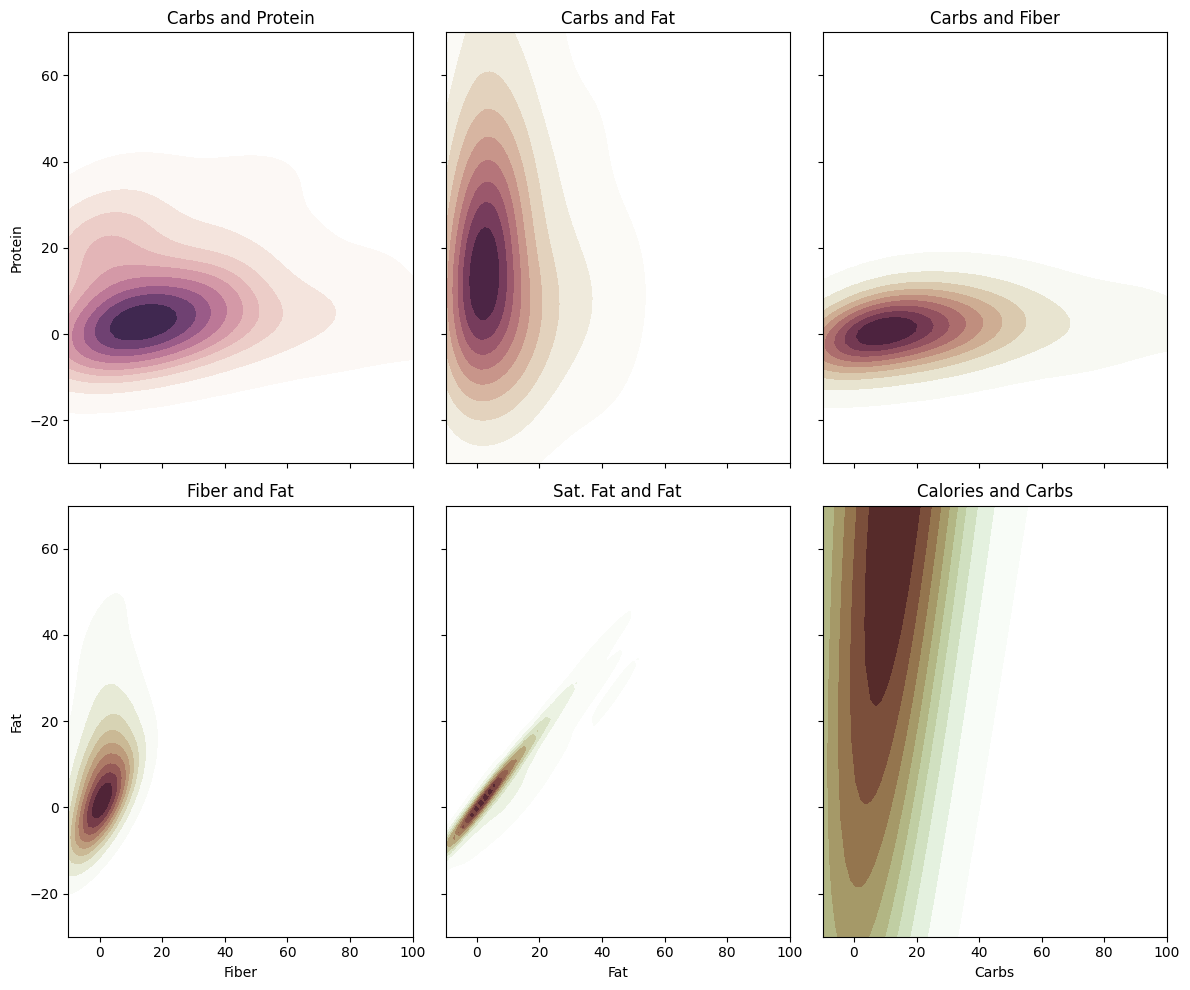

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create subplot grid
f, axes = plt.subplots(2, 3, figsize=(12, 10), sharex=True, sharey=True)

# Plot 1: Carbs vs Protein
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
sns.kdeplot(x=df['Carbs'], y=df['Protein'], cmap=cmap, shade=True, ax=axes[0, 0])
axes[0, 0].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Protein')

# Plot 2: Fat vs Carbs
cmap = sns.cubehelix_palette(start=0.25, light=1, as_cmap=True)
sns.kdeplot(x=df['Fat'], y=df['Carbs'], cmap=cmap, shade=True, ax=axes[0, 1])
axes[0, 1].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Fat')

# Plot 3: Carbs vs Fiber
cmap = sns.cubehelix_palette(start=0.33, light=1, as_cmap=True)
sns.kdeplot(x=df['Carbs'], y=df['Fiber'], cmap=cmap, shade=True, ax=axes[0, 2])
axes[0, 2].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Fiber')

# Plot 4: Fiber vs Fat
cmap = sns.cubehelix_palette(start=0.45, light=1, as_cmap=True)
sns.kdeplot(x=df['Fiber'], y=df['Fat'], cmap=cmap, shade=True, ax=axes[1, 0])
axes[1, 0].set(xlim=(-10, 50), ylim=(-30, 70), title='Fiber and Fat')

# Plot 5: Fat vs Sat.Fat
cmap = sns.cubehelix_palette(start=0.56, light=1, as_cmap=True)
sns.kdeplot(x=df['Fat'], y=df['Sat.Fat'], cmap=cmap, shade=True, ax=axes[1, 1])
axes[1, 1].set(xlim=(-10, 50), ylim=(-30, 70), title='Sat. Fat and Fat')

# Plot 6: Carbs vs Calories
cmap = sns.cubehelix_palette(start=0.68, light=1, as_cmap=True)
sns.kdeplot(x=df['Carbs'], y=df['Calories'], cmap=cmap, shade=True, ax=axes[1, 2])
axes[1, 2].set(xlim=(-10, 100), ylim=(-30, 70), title='Calories and Carbs')

# Adjust layout
f.tight_layout()


In [ ]:
#
alls=['Vegetables A-E',
 'Vegetables F-P',
 'Vegetables R-Z','Breads cereals fastfoodgrains','Seeds and Nuts']

prot= df[df['Category'].isin(alls)]

protein_rich= prot.sort_values(by='Protein', ascending= False)
top_20=protein_rich.head(20)
fig = px.bar(top_20, x='Food', y='Protein', color='Protein', title=' Top 10 protein rich foods')
fig.show()

In [ ]:
#foods to stay away from
cals= df.sort_values(by='Calories', ascending= False)
top_20_cals=cals.head(20)
fig = px.bar(top_20, x='Food', y='Calories' , color='Calories',title=' Top 10 calorie rich foods')
fig.show()

In [ ]:
fats= df.sort_values(by='Fat', ascending= False)
top_20_fat=fats.head(20)
fig = px.bar(top_20_fat, x='Food', y='Calories', color='Calories', title=' Fat Content and Calories')
fig.show()

In [ ]:
#grouping the data into categories so it can give total count of all metrices
category_dist=df.groupby(['Category']).sum()
category_dist

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
Category,,,,,,,,,
Breads cereals fastfoodgrains,BiscuitsBran flakesBread cracked wheatRyeWhite...,11 cup1 slice1 slice1-lb. loaf1-lb. loaf1 slic...,5253,11921.0,403,207,99.0,115.91,2059.0
Dairy products,Cows' milkMilk skimButtermilkEvaporated undilu...,1 qt.1 qt.1 cup1 cup6 cups1 cup1 1/3 cups2/3 c...,7412,8434.0,503,396,322.0,4.40,651.0
Desserts sweets,Apple bettyBread puddingCakesChocolate fudgeCu...,1 serving3/4 cup1 slice1 slice11 slice1 slice1...,2958,6608.0,78,163,150.0,20.50,1184.0
DrinksAlcohol Beverages,BeerGinWinesTable (12.2% alcohol)Carbonated dr...,2 cups1 oz.1/2 cup1/2 cup12 oz.12 oz.12 oz.12 ...,3284,1112.0,0,0,0.0,0.00,167.0
Fats Oils Shortenings,YolksButterButterButterHydrogenated cooking fa...,21T.1/2 cup1/4 lb.1/2 cup1/2 cup1/2 cup1 T.1 T...,695,3629.0,234,631,536.0,234.00,239.0
Fish Seafood,ClamsCodCrab meatFish sticks friedFlounderHadd...,3 oz.3 1/2 oz.3 oz.53 1/2 oz.3 oz.3 1/2 oz.1 s...,1807,2757.0,588,338,252.0,235.00,263.0
Fruits A-F,Watercress stems rawApple juice cannedApple vi...,1 cup1 cup1/3 cup1 med1 cup1 cup1/2 cup3 med.1...,3844,3328.0,29,20,12.0,33.50,812.0
Fruits G-P,"Grapefruit sectionsGrapefruit fresh 5"" diamete...",1 cup1/21 cup1 cup1 cup1 cup1/2 cup6-oz. can6-...,5412,4054.0,28,25,21.0,21.10,1009.0
Fruits R-Z,RaisinsRaspberriesRaw redRhubarb sweetenedStra...,1/2 cup1/2 cup3/4 cup1 cup1 cup1 cupI med.1 wedge,1973,1228.0,7,1,0.0,17.40,330.0


In [ ]:
category_dist=df.groupby(['Category']).sum()
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],[{"type": "domain"},{"type": "domain"},{"type": "domain"}]])

fig.add_trace(go.Pie(values=category_dist['Calories'].values, title='CALORIES', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=1)

fig.add_trace(go.Pie(values=category_dist['Fat'].values,title='FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=2)

fig.add_trace(go.Pie(values=category_dist['Protein'].values,title='PROTEIN', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=3)

fig.add_trace(go.Pie(values=category_dist['Fiber'].values,title='FIBER', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=1)

fig.add_trace(go.Pie(values=category_dist['Sat.Fat'].values,title='SAT.FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=2)

fig.add_trace(go.Pie(values=category_dist['Carbs'].values,title='CARBS', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=3)
fig.update_layout(title_text="Category wise distribution of all metrics",height=700, width=1000)

fig.show()

In [ ]:
drinks= df[df['Category'].isin(['Fish Seafood','Desserts sweets'])]
drinks_top=drinks.sort_values(by='Calories', ascending= False)
drinks_top=drinks_top.head(10)

fig = go.Figure(go.Funnelarea(values=drinks_top['Calories'].values, text=drinks_top['Food'],
                              title = { "text": "Desserts with high calorie percentages"},
               marker = {"colors": ["deepskyblue", "lightsalmon", "tan", "teal", "silver","deepskyblue", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))



fig.show()

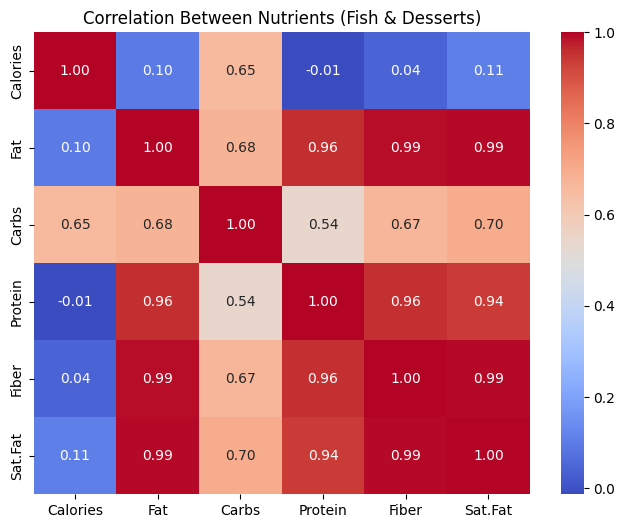

In [ ]:
corr = drinks[['Calories', 'Fat', 'Carbs', 'Protein', 'Fiber', 'Sat.Fat']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Nutrients (Fish & Desserts)')
plt.show()

<ipython-input-18-9221c9705712>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 600x400 with 0 Axes>

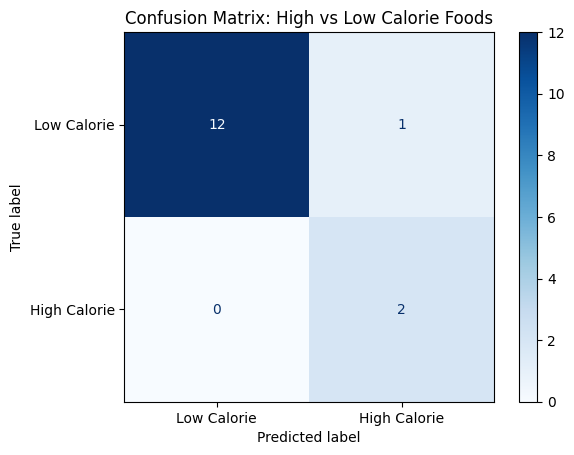

              precision    recall  f1-score   support

 Low Calorie       1.00      0.92      0.96        13
High Calorie       0.67      1.00      0.80         2

    accuracy                           0.93        15
   macro avg       0.83      0.96      0.88        15
weighted avg       0.96      0.93      0.94        15



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Step 1: Create a new binary target variable: High Calorie (1 if Calories > 300, else 0)
drinks['High_Calorie'] = (drinks['Calories'] > 300).astype(int)

# Step 2: Define features and target
X = drinks[['Fat', 'Carbs', 'Protein', 'Fiber', 'Sat.Fat']]
y = drinks['High_Calorie']

# Step 3: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train a classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict on test data
y_pred = model.predict(X_test)

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Calorie', 'High Calorie'])

# Step 7: Plot
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: High vs Low Calorie Foods')
plt.show()

# Optional: Print classification report
print(classification_report(y_test, y_pred, target_names=['Low Calorie', 'High Calorie']))

In [ ]:


# Preprocess: Normalize column names
df.columns = df.columns.str.strip().str.lower()

def generate_meal_plan(preference):
    preference = preference.lower()

    # Example filters based on user input keywords
    if 'high protein' in preference:
        df_filtered = df[df['protein'] >= df['protein'].quantile(0.75)]
    elif 'low fat' in preference:
        df_filtered = df[df['fat'] <= df['fat'].quantile(0.25)]
    elif 'low carbs' in preference:
        df_filtered = df[df['carbs'] <= df['carbs'].quantile(0.25)]
    elif 'high fiber' in preference:
        df_filtered = df[df['fiber'] >= df['fiber'].quantile(0.75)]
    elif 'vegetarian' in preference:
        df_filtered = df[df['category'].str.contains('vegetarian', case=False, na=False)]
    else:
        df_filtered = df.copy()

    if df_filtered.empty:
        return "No meals found for that preference."

    # Sample meals for a plan
    breakfast = df_filtered.sample(1)
    lunch = df_filtered.sample(1)
    dinner = df_filtered.sample(1)

    plan = {
        "Breakfast": breakfast[['food', 'calories', 'protein', 'fat', 'carbs']].to_dict(orient='records')[0],
        "Lunch": lunch[['food', 'calories', 'protein', 'fat', 'carbs']].to_dict(orient='records')[0],
        "Dinner": dinner[['food', 'calories', 'protein', 'fat', 'carbs']].to_dict(orient='records')[0],
    }

    return plan

# Example
user_input = input("Enter your dietary preference: ")
meal_plan = generate_meal_plan(user_input)
print("\nGenerated Meal Plan:")
for meal, details in meal_plan.items():
    print(f"\n{meal}:")
    for k, v in details.items():
        print(f"  {k.capitalize()}: {v}")

In [ ]:
pip install speechrecognition pandas sounddevice scipy

In [ ]:
pip install pytesseract pillow pandas

In [ ]:
!pip install tensorflow pandas matplotlib
from google.colab import files
uploaded = files.upload()

Saving Cake.jpg to Cake.jpg


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
from PIL import Image
import os

# Preprocessing function
def preprocess_image(img_path, target_size=(64, 64)):
    img = image.load_img(img_path, target_size=target_size)
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.  # Normalize
    return img_tensor

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Simulate prediction from CNN
def dummy_predict(img_path):
    # Simulate based on file name
    if "rice" in img_path.lower():
        return "Rice"
    elif "salad" in img_path.lower():
        return "Salad"
    elif "fish" in img_path.lower():
        return "Fish Seafood"
    else:
        return "Desserts sweets"

In [ ]:
def generate_meal_plan(category):
    filtered = df[df['Category'].str.contains(category, case=False, na=False)]
    if filtered.empty:
        return "No meals found for this category."
    return filtered[['Food', 'Calories', 'Fat', 'Carbs', 'Protein', 'Fiber']].head(5)

In [ ]:
image_path = "Cake.jpg"  # Update to your uploaded file name

# Predict food category (simulate or use model.predict)
predicted_category = dummy_predict(image_path)

print(f"✅ Predicted Category: {predicted_category}")

# Generate meal plan
print("\n🥗 Suggested Meal Plan:")
print(generate_meal_plan(predicted_category))

✅ Predicted Category: Desserts sweets

🥗 Suggested Meal Plan:
No meals found for this category.


In [ ]:
# Install required libraries
!pip install tensorflow tensorflow_datasets pandas matplotlib

# Import libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'food101',
    split=['train', 'validation'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

In [ ]:
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

# Preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = image / 255.0  # Normalize to [0,1]
    return image, label

# Apply preprocessing to datasets
ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache().shuffle(1000).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

ds_test = ds_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE).cache().prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
# Load the base model
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Add custom classification head
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(101, activation='softmax')  # 101 classes in Food-101
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Load the base model
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Add custom classification head
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(101, activation='softmax')  # 101 classes in Food-101
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(ds_train,
                    epochs=5,  # Adjust epochs as needed
                    validation_data=ds_test)


Epoch 1/5
 441/2368 ━━━━━━━━━━━━━━━━━━━━ 2:35 81ms/step - accuracy: 0.2106 - loss: 3.5513